# Linear Regression using Gradient Descent

---
Let's suppose we have **N points** in two-dimensional space and we want to model this set of points with a line.
To do this we'll use the standrad **y = mx + b** line equation where 

*   **y** is the output variable that we are trying to predict.
*   **m** is the line's slope that we need to estimate.
*   **x** is the input variable.
*   **b** is the line's y-intercept or bias that we need to estimate.

To find the best line for our data, we need to find the best set of slope m and y-intercept b values.
To do this we'll user **Sum of Squared Errors (SSE)** method and this error function looks like  :

![Sum of Squares Error Function](https://spin.atomicobject.com/wp-content/uploads/linear_regression_error1.png)
![SSE Chart](https://cdn-images-1.medium.com/max/1600/1*A71zTD6_QqUzLhMKj1Rgiw.png)

We wil implement this method in *computeErrorForLineGivenPoints* function.

Lines that fit our data better (where better is defined by our error function) will result in lower error values. If we minimize this function, we will get the best line for our data. Since our error function consists of two parameters (m and b) we can visualize it as a two-dimensional surface. This is what it looks like for our data set:

![Gradient Descent Error Surface](https://spin.atomicobject.com/wp-content/uploads/gradient_descent_error_surface.png)

When we run **Gradient Descent** search, we will start from some location on this surface and move downhill to find the line with the lowest error.
To run gradient descent on this error function, we first need to compute its gradient. The gradient will act like a compass and always point us downhill. To compute it, we will need to differentiate our error function. Since our function is defined by two parameters (m and b), we will need to compute a partial derivative for each. These derivatives work out to be:

![Linear Regression Gradient](https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png)

We will use this formoula in *gradientDescent* function.

We now have all the tools needed to run gradient descent. We can initialize our search to start at any pair of m and b values (i.e., any line) and let the gradient descent algorithm march downhill on our error function towards the best line. Each iteration will update m and b to a line that yields slightly lower error than the previous iteration. The direction to move in for each iteration is calculated using the two partial derivatives from above.


In [0]:
# import libraries
from numpy import *
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [85]:
# for upload dataset to google colab
uploaded = files.upload()

Saving data.csv to data (1).csv


In [0]:
# loading our dataset
points = genfromtxt('data.csv', delimiter=',')

In [0]:
# setting hyperparameters

learning_rate = 0.0001
# The learning_rate variable controls how large of a step we take downhill during each iteration
# if the learning rate is too low, our model will be too slow to converge
# whereas if it's too high, our model will never converge.

initial_b = 0
initial_m = 0
# y = mx + b

iterations_number = 5000 
# you can change this number based on your system's computing power and dataset

In [0]:
# show plot function after a desired iteration
def showPlot(b, m, iterationNumber):
    width = max(points[:,0])
    height = max(points[:,1])
    plt.title('Points plot after {0} iteration'.format(iterationNumber))
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.scatter(points[:,0], points[:,1], color='black', s=15, label='Data')
    distance = 10
    start_point_x = min(points[:,0]) - distance
    end_point_x = max(points[:,0]) + distance
    plt.plot([start_point_x, end_point_x], [start_point_x*m+b, end_point_x*m+b], color='red', linewidth=3, alpha=0.7, label='Gradient Descent')
    plt.legend()
    plt.show()

In [0]:
# implementing SSE function
def computeErrorForLineGivenPoints(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        # points[i][1] means points[i].y
        # points[i][0] means points[i].x
        totalError += (points[i][1] - (m * points[i][0] + b)) ** 2
    return totalError / float(len(points))

In [0]:
# implementig gradient descent function
def gradientDescent(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        b_gradient += -(2/N) * (points[i][1] - ((current_m*points[i][0]) + current_b))
        m_gradient += -(2/N) * points[i][0] * (points[i][1] - ((current_m * points[i][0]) + current_b))
    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)
    return [new_b, new_m]

In [0]:
# implementig gradient descent runner
def gradientDescentIterator(points):
    b = initial_b
    m = initial_m
    for i in range(iterations_number):
      b, m = gradientDescent(b, m, array(points), learning_rate)
      # showPlot(b, m, i)
      # remove comment notation if you want to check the situation of each iteration
    return [b, m]

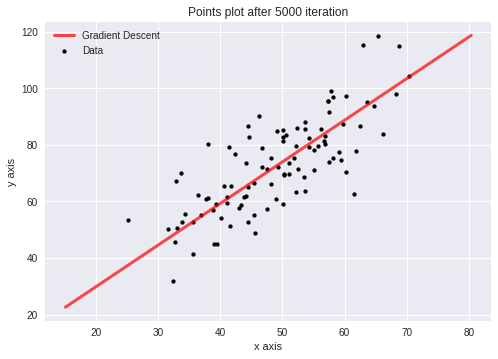

After 5000 iterations b = 0.3239436244645088, m = 1.4731250921538916, error = 112.47667596020761


In [92]:
# run
[b, m] = gradientDescentIterator(points)
showPlot(b, m, iterations_number)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(iterations_number, b, m, computeErrorForLineGivenPoints(b, m, points)))

# Resources

*   **[Intro - The Math of Intelligence by Siraj Raval](https://youtu.be/xRJCOz3AfYY)**
*   **[An Introduction to Gradient Descent and Linear Regression by Matt Nedrich](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)**
*   **[How to Do Linear Regression using Gradient Descent by Siraj Raval](https://youtu.be/XdM6ER7zTLk)**
*   **[Linear Regression Tutorial Using Gradient Descent for Machine Learning by Jason Brownlee](https://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/) **
* **[Linear Regression with Gradient Descent - Intelligence and Learning by Daniel Shiffman](https://youtu.be/L-Lsfu4ab74)**